In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Heart_Disease_Prediction.csv')
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,80,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,55,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,65,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,45,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [4]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.077778,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.201052,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,47.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,54.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,60.750000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,80.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [5]:
df.isna().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

### Column Details:

* Age: Age of the patient

* Sex: Gender of the patient (0 = Female, 1 = Male)

* Chest pain type: Type of chest pain (values 1-4)

* BP: Blood Pressure

* Cholesterol: Cholesterol level

* FBS over 120: Fasting blood sugar > 120 mg/dl (0 = False, 1 = True)

* EKG results: Results of electrocardiographic test (values 0-2)

* Max HR: Maximum heart rate achieved

* Exercise angina: Exercise-induced angina (0 = No, 1 = Yes)

* ST depression: ST depression induced by exercise relative to rest

* Slope of ST: Slope of the peak exercise ST segment (values 1-3)

* Number of vessels fluro: Number of major vessels colored by fluoroscopy (values 0-3)

* Thallium: Thallium stress test result (values 3, 6, 7)

* Heart Disease: Presence or absence of heart disease (Presence, Absence)

In [6]:
df['Sex'] = df['Sex'].map({0: 'Female', 1: 'Male'})

([<matplotlib.patches.Wedge at 0x248f4a07b90>,
 [Text(-0.9526279098330698, 0.5500000594609756, 'Male'),
  Text(0.9526278840857078, -0.5500001040567061, 'Female')],
 [Text(-0.5196152235453108, 0.3000000324332594, '83%'),
  Text(0.519615209501295, -0.30000005675820324, '17%')])

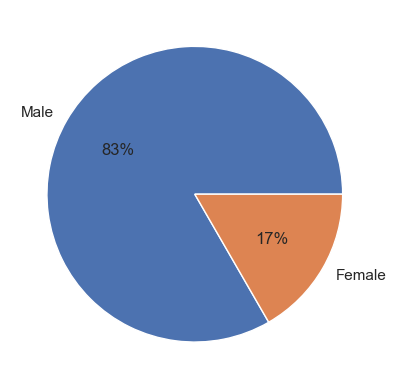

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
data = df[df['Heart Disease'] == 'Presence']['Sex'].value_counts()
plt.pie(data, labels = data.index, autopct='%.0f%%') 

Men are more susceptible to heart disease than women.

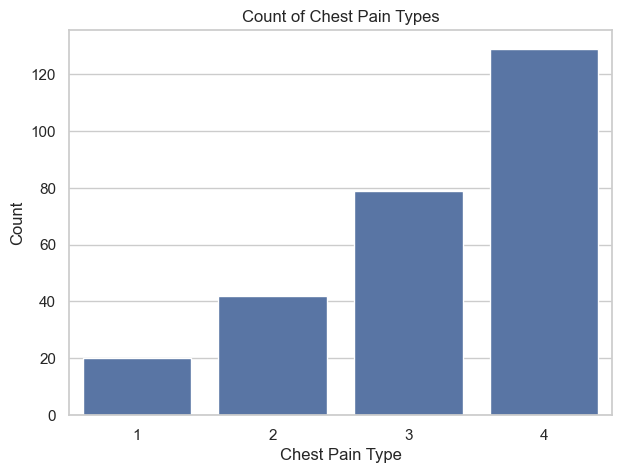

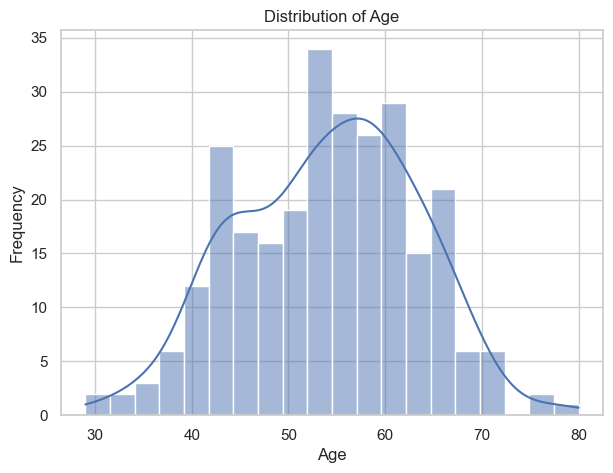

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


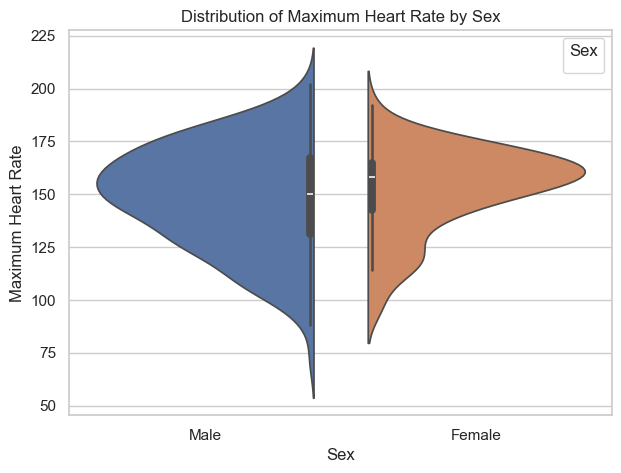

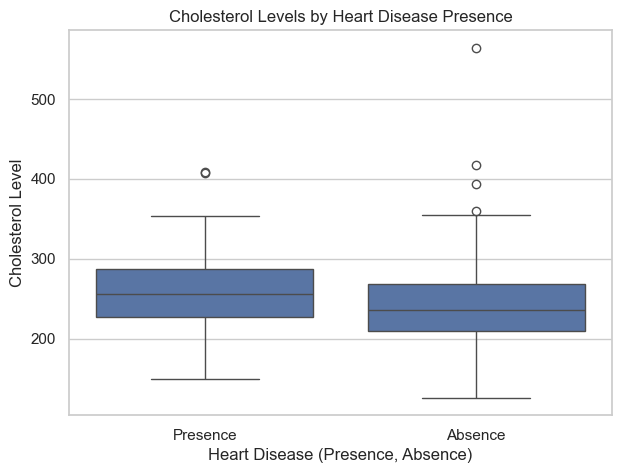

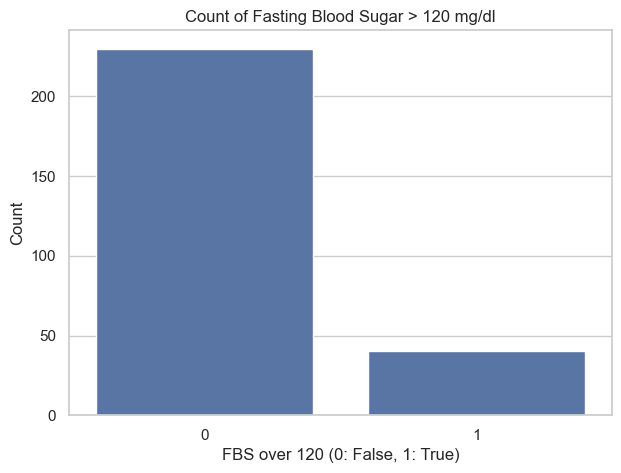

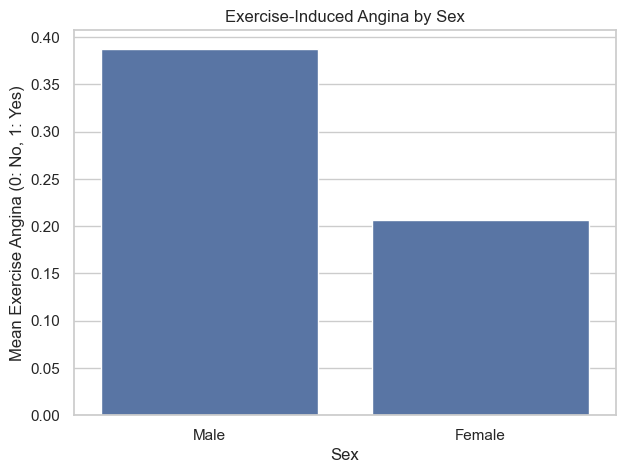

In [8]:
# Plot 1: Count plot of chest pain type
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Chest pain type')
plt.title('Count of Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

# Plot 2: Distribution of age
plt.figure(figsize=(7, 5))
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot 3: Violin plot of maximum heart rate achieved by sex
plt.figure(figsize=(7, 5))
sns.violinplot(data=df, x='Sex', y='Max HR', hue='Sex', split=True)
plt.title('Distribution of Maximum Heart Rate by Sex')
plt.ylabel('Maximum Heart Rate')
plt.legend(title='Sex', loc='upper right')
plt.show()

# Plot 4: Box plot of cholesterol levels by presence of heart disease
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x='Heart Disease', y='Cholesterol')
plt.title('Cholesterol Levels by Heart Disease Presence')
plt.xlabel('Heart Disease (Presence, Absence)')
plt.ylabel('Cholesterol Level')
plt.show()

# Plot 5: Count plot of FBS over 120
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='FBS over 120')
plt.title('Count of Fasting Blood Sugar > 120 mg/dl')
plt.xlabel('FBS over 120 (0: False, 1: True)')
plt.ylabel('Count')
plt.show()

# Plot 6: Bar plot of exercise-induced angina by sex
plt.figure(figsize=(7, 5))
sns.barplot(data=df, x='Sex', y='Exercise angina', ci=None)
plt.title('Exercise-Induced Angina by Sex')
plt.xlabel('Sex')
plt.ylabel('Mean Exercise Angina (0: No, 1: Yes)')
plt.show()

* Cholesterol Levels:
1) Median cholesterol levels are slightly higher in individuals with heart disease compared to those without.
2) Both groups have similar interquartile ranges.
3) There are more outliers with higher cholesterol levels in the group without heart disease.

* Exercise-Induced Angina:
1) Males have a higher mean occurrence of exercise-induced angina compared to females.
2) The mean value for males is around 0.4, while for females it is approximately 0.2, indicating that exercise-induced angina is more common in males.

* Distribution of Maximum Heart Rate by Sex
1) Females have a higher mean occurrence of Maximum heart rate than Males.

In [9]:
df.groupby(['Chest pain type'])['Heart Disease'].value_counts()

Chest pain type  Heart Disease
1                Absence          15
                 Presence          5
2                Absence          35
                 Presence          7
3                Absence          62
                 Presence         17
4                Presence         91
                 Absence          38
Name: count, dtype: int64

* Chest Pain type : Higher chest pain level indicates more Presence of Heart Disease. The ratio of (Presence/Absence) is Higher compared to the lower level of pain type.

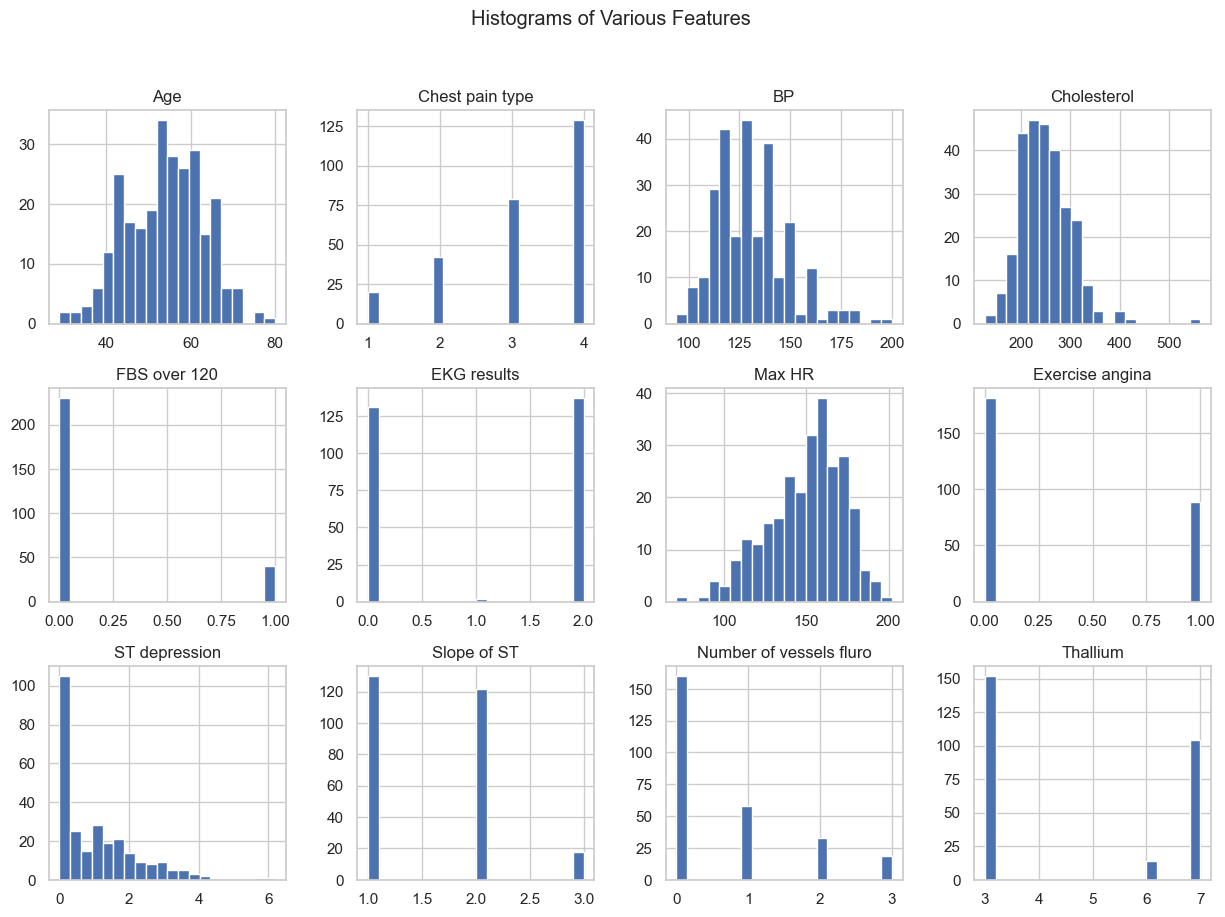

In [10]:
df.hist(bins=20, figsize=(15, 10), layout=(3, 4))
plt.suptitle('Histograms of Various Features')
plt.show()

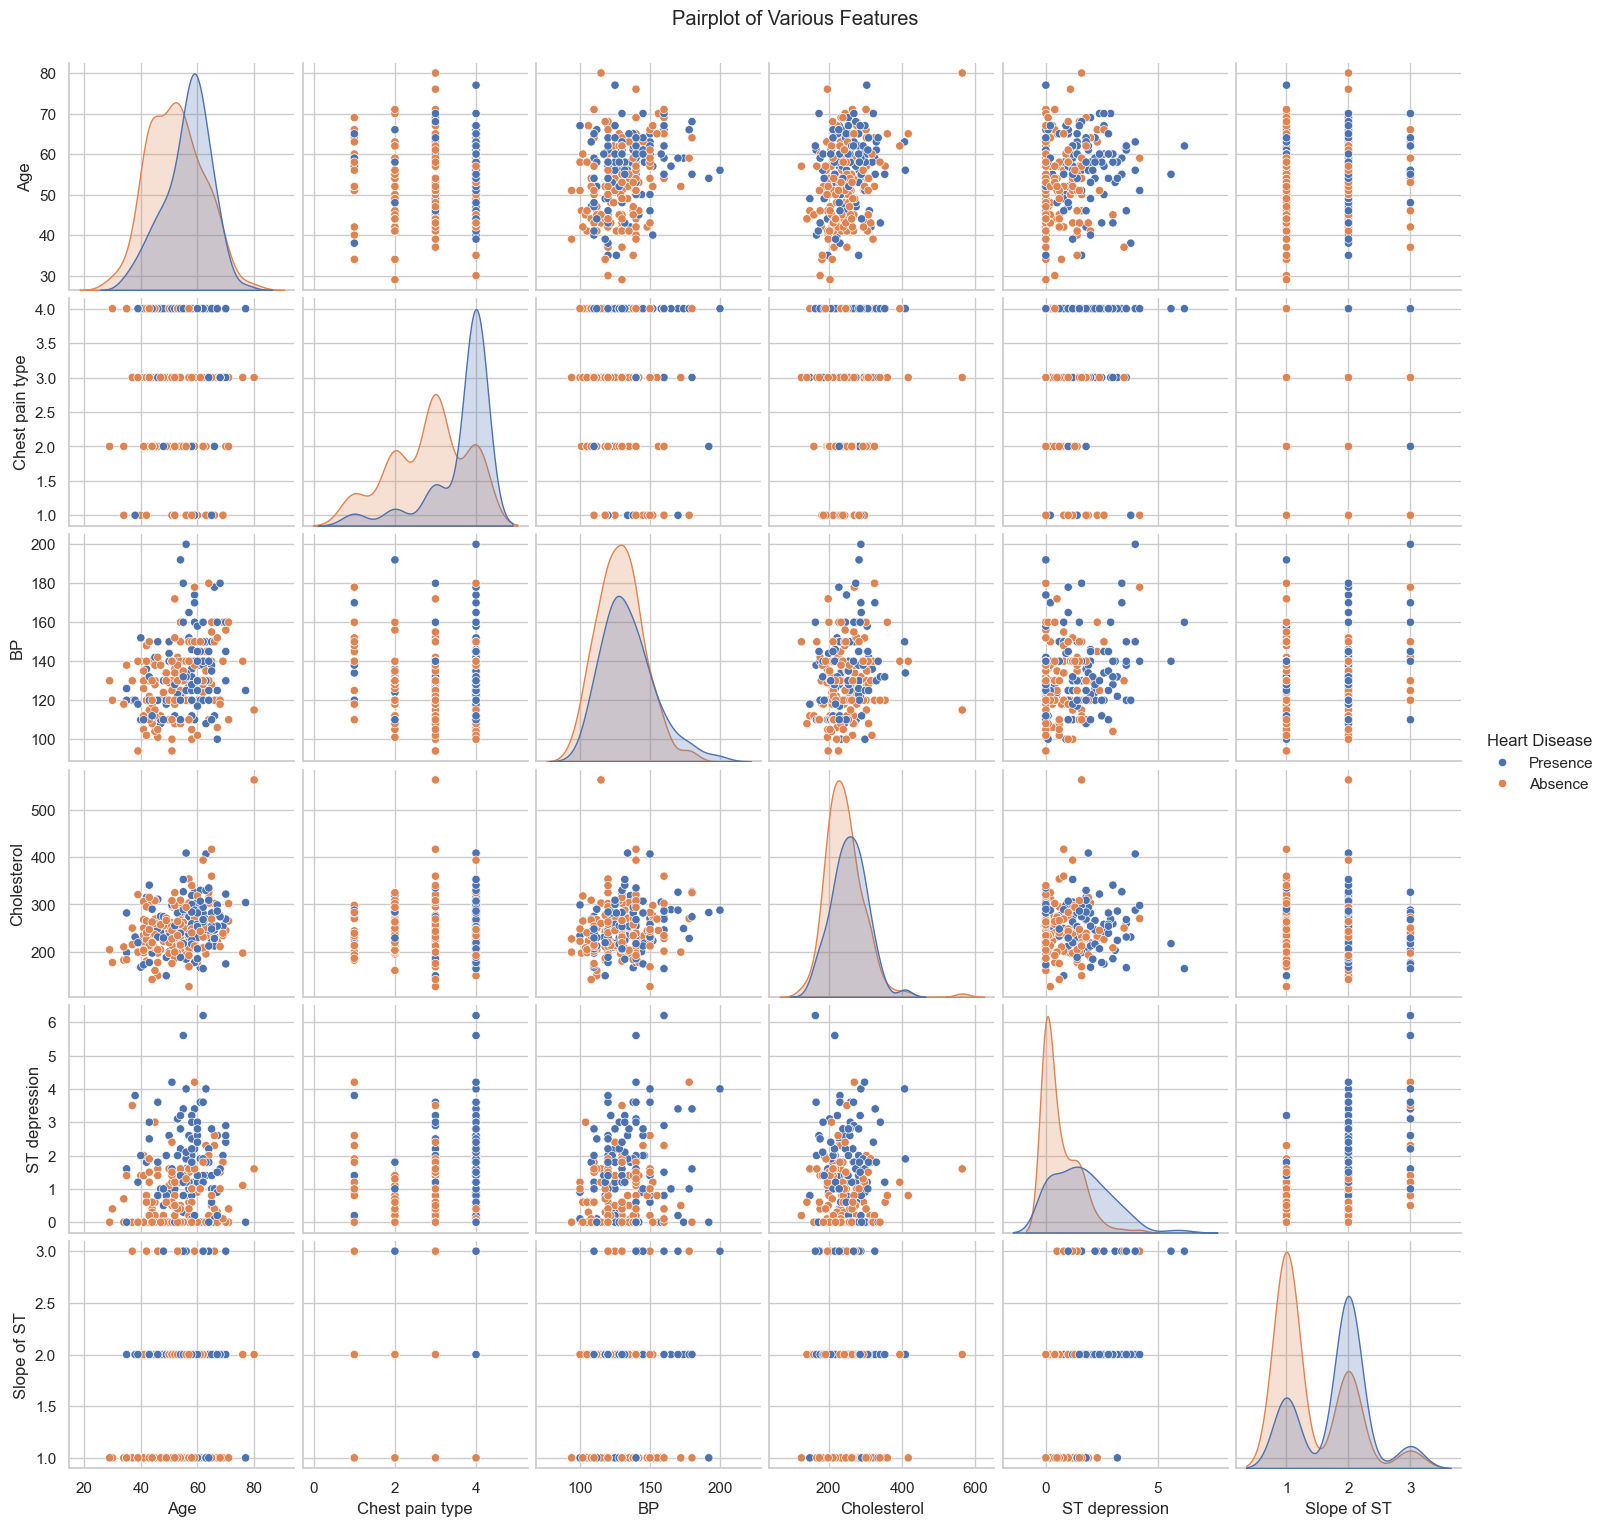

In [11]:
data = df[['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'Heart Disease', 'ST depression', 'Slope of ST']]
sns.pairplot(data, hue='Heart Disease')
plt.suptitle('Pairplot of Various Features', y=1.02)
plt.show()

* Age:
Individuals with heart disease tend to be older than those without heart disease.
* Chest pain type:
Higher chest pain types are more associated with the presence of heart disease.
* BP (Blood Pressure):
No clear separation between the presence and absence of heart disease.
* Cholesterol:
Cholesterol levels do not distinctly separate heart disease presence from absence.
* ST depression:
Higher ST depression levels are associated with the presence of heart disease.
* Slope of ST:
Certain slopes (like type 2) are more common in individuals with heart disease.

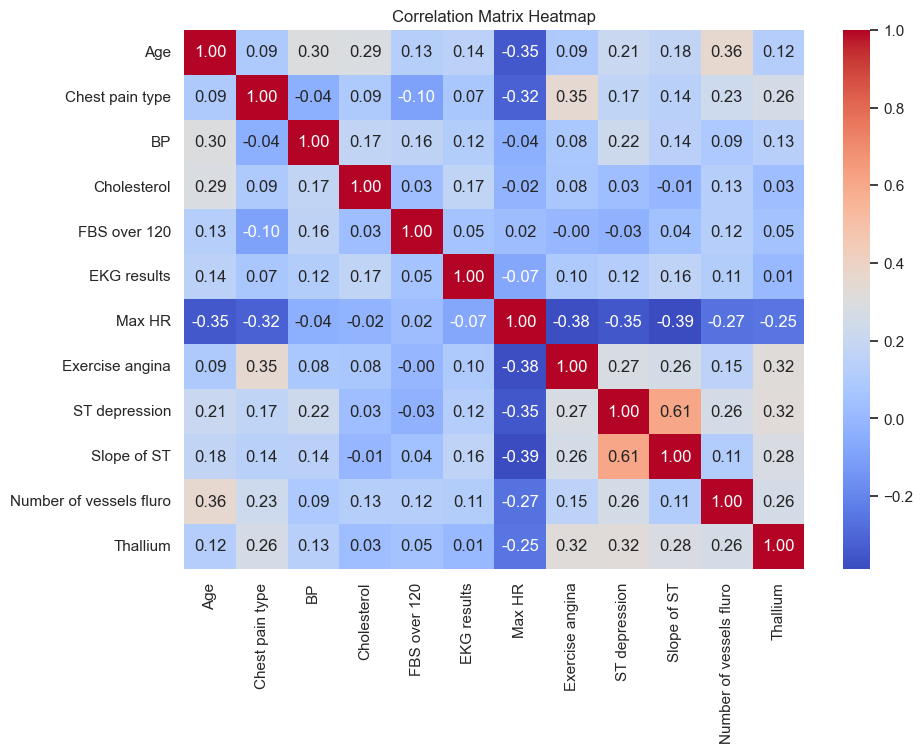

In [12]:
plt.figure(figsize=(10, 7))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [13]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer

Num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

Cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('Encoder', OneHotEncoder())
])

Preprocess = ColumnTransformer([
    ('Num', Num_pipeline, ['Age', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium']),
    ('Cat', Cat_pipeline, ['Sex'])
],
remainder=Cat_pipeline
)

In [14]:
processed_data = Preprocess.fit_transform(df)

In [15]:
Cols = Preprocess.get_feature_names_out()

In [16]:
pd.DataFrame(data=processed_data, columns=Cols)

,Num__Age,Num__Chest pain type,Num__BP,Num__Cholesterol,Num__FBS over 120,Num__EKG results,Num__Max HR,Num__Exercise angina,Num__ST depression,Num__Slope of ST,Num__Number of vessels fluro,Num__Thallium,Cat__Sex_Female,Cat__Sex_Male,remainder__Heart Disease_Absence,remainder__Heart Disease_Presence
0,1.733692,0.870928,-0.075410,1.402212,-0.417029,0.981664,-1.759208,-0.701222,1.181012,0.676419,2.472682,-0.875706,0.0,1.0,0.0,1.0
1,2.822543,-0.183559,-0.916759,6.093004,-0.417029,0.981664,0.446409,-0.701222,0.481153,0.676419,-0.711535,1.189277,1.0,0.0,1.0,0.0
2,0.100416,-1.238045,-0.411950,0.219823,-0.417029,-1.026285,-0.375291,-0.701222,-0.656118,-0.954234,-0.711535,1.189277,0.0,1.0,0.0,1.0
3,1.189267,0.870928,-0.187590,0.258589,-0.417029,-1.026285,-1.932198,1.426081,-0.743600,0.676419,0.349871,1.189277,0.0,1.0,1.0,0.0
4,-0.988434,-1.238045,-0.636310,0.374890,-0.417029,0.981664,-1.240239,1.426081,-0.743600,-0.954234,0.349871,-0.875706,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,-0.226239,-0.183559,2.280369,-0.981951,2.397916,-1.026285,0.532904,-0.701222,-0.481153,-0.954234,-0.711535,1.189277,0.0,1.0,1.0,0.0
266,-1.097319,-1.238045,-0.636310,0.258589,-0.417029,-1.026285,1.008625,-0.701222,-0.918565,-0.954234,-0.711535,1.189277,0.0,1.0,1.0,0.0
267,0.209301,-1.238045,0.485490,0.859476,-0.417029,0.981664,0.143677,-0.701222,0.218706,0.676419,-0.711535,-0.875706,1.0,0.0,1.0,0.0
268,0.318186,0.870928,0.485490,-1.117635,-0.417029,-1.026285,-0.072560,-0.701222,-0.568636,0.676419,-0.711535,0.673032,0.0,1.0,1.0,0.0


## Model Training - 
### 1) Spliting train and test sets
### 2) Model Training
### 3) Hypertunning

In [17]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size=0.8, shuffle=True, random_state=42)
train_X, train_y = train.drop('Heart Disease', axis=1).copy(), train['Heart Disease'].copy()
test_X, test_y = test.drop('Heart Disease', axis=1).copy(), test['Heart Disease'].copy()

# Logisitic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

log_clf = make_pipeline(
    Preprocess,
    LogisticRegression(random_state=42, max_iter=150)
)

log_clf.fit(train_X,train_y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('imputer',
                                                              SimpleImputer(strategy='most_frequent')),
                                                             ('Encoder',
                                                              OneHotEncoder())]),
                                   transformers=[('Num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Chest pain type',
                                                   'BP', 'Cholesterol',
                                                   'FBS over 120',
                                                   'EKG results', 'Max HR',
                                                   'Exercise angina',
                                                   'ST depression',
                                                   'Slope of ST',
                                                   'Number of vessels fluro',
                                                   'Thallium']),
                                                 ('Cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Encoder',
                                                                   OneHotEncoder())]),
                                                  ['Sex'])])),
                ('logisticregression',
                 LogisticRegression(max_iter=150, random_state=42))])

In [19]:
from sklearn.model_selection import cross_val_score
cross_val_score(log_clf, train_X, train_y, cv=5).sum()/5

0.8244186046511628

### Hypertunning

In [20]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

param_grid = {
    'logisticregression__C': [0.1, 1.0, 10.0],
    'logisticregression__max_iter': [100, 300, 500, 1000],
    'logisticregression__tol': [0.001, 0.01, 0.1],
    'logisticregression__fit_intercept': [True, False],
    'logisticregression__class_weight': ['balanced', None],
    'logisticregression__solver': ['lbfgs', 'liblinear'],
}

Ridge_search = RandomizedSearchCV(
    log_clf,  param_distributions=param_grid, n_iter=5, cv=3, scoring='accuracy', random_state=42
)
Ridge_search.fit(train_X, train_y)

pred_y = Ridge_search.predict(test_X)
print("Test set accuracy: ", accuracy_score(test_y, pred_y))
print(classification_report(test_y, pred_y))

Test set accuracy:  0.9074074074074074
              precision    recall  f1-score   support

     Absence       0.91      0.94      0.93        33
    Presence       0.90      0.86      0.88        21

    accuracy                           0.91        54
   macro avg       0.91      0.90      0.90        54
weighted avg       0.91      0.91      0.91        54



# RidgeClassifier

In [21]:
from sklearn.linear_model import RidgeClassifier


ridge_clf = make_pipeline(
    Preprocess,
    RidgeClassifier()
)
ridge_clf.fit(train_X, train_y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('imputer',
                                                              SimpleImputer(strategy='most_frequent')),
                                                             ('Encoder',
                                                              OneHotEncoder())]),
                                   transformers=[('Num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Chest pain type',
                                                   'BP', 'Cholesterol',
                                                   'FBS over 120',
                                                   'EKG results', 'Max HR',
                                                   'Exercise angina',
                                                   'ST depression',
                                                   'Slope of ST',
                                                   'Number of vessels fluro',
                                                   'Thallium']),
                                                 ('Cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Encoder',
                                                                   OneHotEncoder())]),
                                                  ['Sex'])])),
                ('ridgeclassifier', RidgeClassifier())])

In [22]:
cross_val_score(ridge_clf, train_X, train_y, cv=3, scoring='accuracy').sum()/3

0.8101851851851851

### Hypertunning and Testing

In [23]:
param_grid = {
    'ridgeclassifier__alpha': [0.1, 1.0, 10.0],
    'ridgeclassifier__max_iter': [100, 300, 500, 1000],
    'ridgeclassifier__tol': [0.001, 0.01, 0.1],
    'ridgeclassifier__fit_intercept': [True, False]
}

Ridge_search = RandomizedSearchCV(
    ridge_clf,  param_distributions=param_grid, n_iter=5, cv=3, scoring='accuracy', random_state=42
)
Ridge_search.fit(train_X, train_y)

pred_y = Ridge_search.predict(test_X)
print("Test set accuracy: ", accuracy_score(test_y, pred_y))
print(classification_report(test_y, pred_y))

Test set accuracy:  0.9259259259259259
              precision    recall  f1-score   support

     Absence       0.91      0.97      0.94        33
    Presence       0.95      0.86      0.90        21

    accuracy                           0.93        54
   macro avg       0.93      0.91      0.92        54
weighted avg       0.93      0.93      0.93        54



In [24]:
Final_model = Ridge_search.best_estimator_
ridge_classifier_ = Final_model.named_steps['ridgeclassifier']
print(Final_model.named_steps)

{'columntransformer': ColumnTransformer(remainder=Pipeline(steps=[('imputer',
                                             SimpleImputer(strategy='most_frequent')),
                                            ('Encoder', OneHotEncoder())]),
                  transformers=[('Num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Chest pain type', 'BP', 'Cholesterol',
                                  'FBS over 120', 'EKG results', 'Max HR',
                                  'Exercise angina', 'ST depression',
                                  'Slope of ST', 'Number of vessels fluro',
                                  'Thallium']),
                                ('Cat',
                                 Pipeline(steps=[('imputer',
                                         

In [25]:
preprocess_step_name = 'columntransformer'

feature_importances = ridge_classifier_.coef_[0]
feature_names = Final_model.named_steps[preprocess_step_name].get_feature_names_out()
feature_importances_dict = dict(zip(feature_names, feature_importances))

for feature, importance in feature_importances_dict.items():
    print(f"Feature: {feature}, Importance: {importance}")

Feature: Num__Age, Importance: -0.02632432483561126
Feature: Num__Chest pain type, Importance: 0.18538005552231437
Feature: Num__BP, Importance: 0.09243618179292803
Feature: Num__Cholesterol, Importance: 0.058119953620434386
Feature: Num__FBS over 120, Importance: -0.07270546669882585
Feature: Num__EKG results, Importance: 0.019784538894329903
Feature: Num__Max HR, Importance: -0.060989382528357006
Feature: Num__Exercise angina, Importance: 0.11530553751788798
Feature: Num__ST depression, Importance: 0.14323572851450966
Feature: Num__Slope of ST, Importance: 0.08531427639365573
Feature: Num__Number of vessels fluro, Importance: 0.22555622546665458
Feature: Num__Thallium, Importance: 0.21484256485814057
Feature: Cat__Sex_Female, Importance: -0.15994489594729672
Feature: Cat__Sex_Male, Importance: 0.1599448959472912


# Brief Analysis of Feature Importances
1) Age: Negative importance (-0.026) indicating older age might slightly decrease the probability of being classified as having heart disease.
   * Strange! Probably our training sets have people who does't have heart disease at higher age. Outliers +_+ 
   
2) Chest pain type: Positive importance (0.185) showing strong correlation with being classified as having heart disease.

3) BP (Blood Pressure): Moderate positive importance (0.092) indicating higher BP slightly increases the probability of being classified as having heart disease.

4) Cholesterol: Moderate positive importance (0.058) showing higher cholesterol slightly increases the probability of being classified as having heart disease.

5) FBS over 120: Negative importance (-0.073) indicating fasting blood sugar over 120 slightly decreases the probability of being classified as having heart disease.

6) EKG results: Slight positive importance (0.020) indicating certain EKG results slightly increase the probability of being classified as having heart disease.

7) Max HR (Maximum Heart Rate): Negative importance (-0.061) indicating higher max heart rate slightly decreases the probability of being classified as having heart disease.

8) Exercise angina: Positive importance (0.115) showing the presence of exercise-induced angina increases the probability of being classified as having heart disease.

9) ST depression: Positive importance (0.143) indicating higher ST depression increases the probability of being classified as having heart disease.

10) Slope of ST: Moderate positive importance (0.085) showing the slope of the ST segment has a positive correlation with being classified as having heart disease.

11) Number of vessels fluro: Strong positive importance (0.226) indicating more vessels observed in fluoroscopy strongly correlates with being classified as having heart disease.

12) Thallium: Strong positive importance (0.215) indicating higher thallium stress test results strongly correlate with being classified as having heart disease.

13) Sex (Female): Negative importance (-0.160) indicating being female decreases the probability of being classified as having heart disease.

14) Sex (Male): Positive importance (0.160) indicating being male increases the probability of being classified as having heart disease.


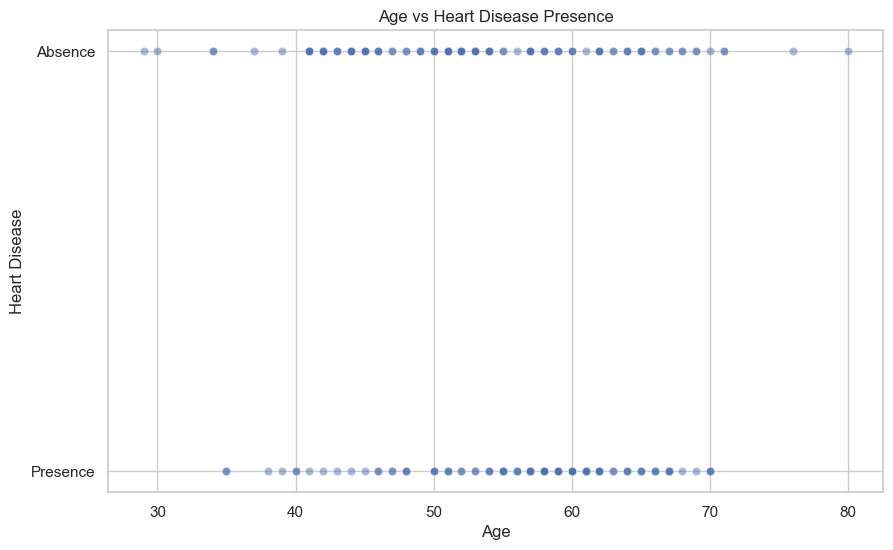

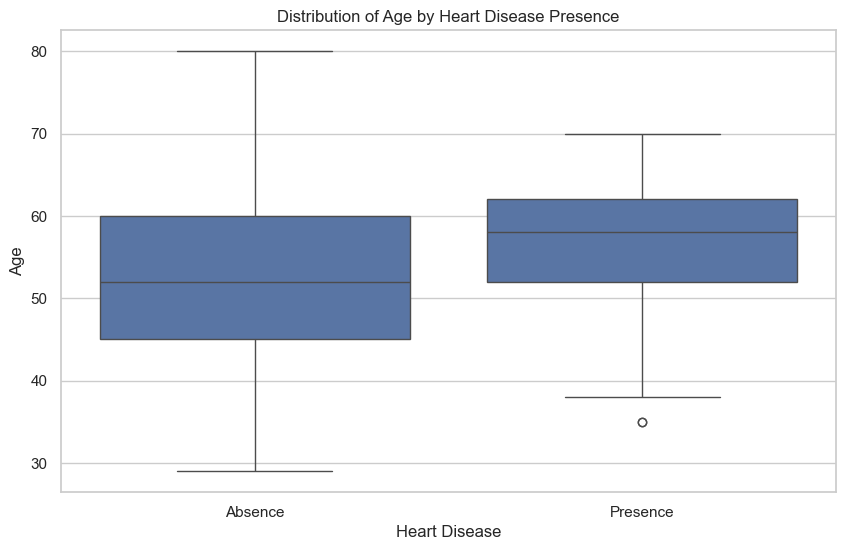

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = pd.concat([train_X, train_y], axis=1)
data.columns = list(train_X.columns) + ['Heart Disease']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Heart Disease', data=data, alpha=0.5)
plt.title('Age vs Heart Disease Presence')
plt.xlabel('Age')
plt.ylabel('Heart Disease')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Heart Disease', y='Age', data=data)
plt.title('Distribution of Age by Heart Disease Presence')
plt.xlabel('Heart Disease')
plt.ylabel('Age')
plt.show()


* Our model's performance is impacted by the presence of outliers in the age feature. We can't do anything about this. We got 93% accuracy.

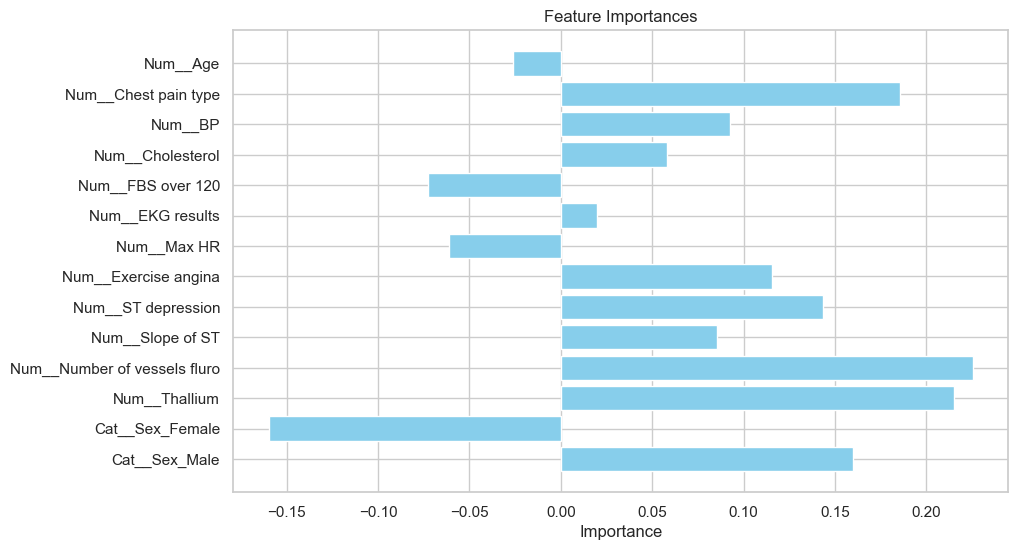

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Feature names and their corresponding importances
features = ['Num__Age', 'Num__Chest pain type', 'Num__BP', 'Num__Cholesterol',
            'Num__FBS over 120', 'Num__EKG results', 'Num__Max HR', 'Num__Exercise angina',
            'Num__ST depression', 'Num__Slope of ST', 'Num__Number of vessels fluro',
            'Num__Thallium', 'Cat__Sex_Female', 'Cat__Sex_Male']
importances = [-0.02632432483561126, 0.18538005552231437, 0.09243618179292803, 0.058119953620434386,
               -0.07270546669882585, 0.019784538894329903, -0.060989382528357006, 0.11530553751788798,
               0.14323572851450966, 0.08531427639365573, 0.22555622546665458, 0.21484256485814057,
               -0.15994489594729672, 0.1599448959472912]

# Plotting the feature importances
plt.figure(figsize=(10, 6))
y_pos = np.arange(len(features))

plt.barh(y_pos, importances, align='center', color='skyblue')
plt.yticks(y_pos, features)
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

* Negative Importance Value: 

When a feature has a negative importance value, it suggests that increases in this feature are associated with decreases in the probability or score of the target variable (or vice versa). In other words, for this model, higher values of features with negative importance may reduce the likelihood of the positive class (e.g., the presence of heart disease).

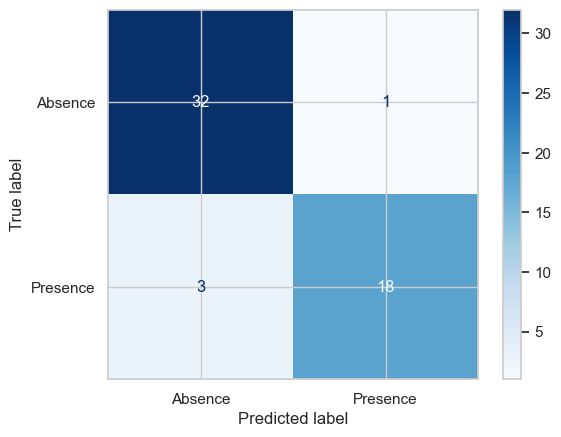

Test set accuracy:  0.9259259259259259
              precision    recall  f1-score   support

     Absence       0.91      0.97      0.94        33
    Presence       0.95      0.86      0.90        21

    accuracy                           0.93        54
   macro avg       0.93      0.91      0.92        54
weighted avg       0.93      0.93      0.93        54



In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
cm = confusion_matrix(test_y, pred_y, labels=Ridge_search.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Ridge_search.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

print("Test set accuracy: ", accuracy_score(test_y, pred_y))
print(classification_report(test_y, pred_y))

In [29]:
import joblib

joblib.dump(Final_model, "Cardio_healthRiskPred.pkl")

['Cardio_healthRiskPred.pkl']